In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#!ls "/content/drive/My Drive"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
from PIL import Image
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report

from keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import warnings
from datetime import datetime
start_time = datetime.now()
warnings.filterwarnings('ignore')


In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/chest_xray.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/chest_xray/")
zip_ref.close()

KeyboardInterrupt: ignored

#### Objective ####
The objective of this project is to determine if the given chest x-ray is infected with Pneumonia or normal. This is a classification problem. 

#### Dataset ####
The dataset used are chest x-ray images (AP) of pediatric patients (1-5 yo) from Guangzhou Women and Children's Medical Center in Guangzhou, China. The datasetis organized into three folders (train, test, and val) and contains subfolders (Pneumonia and Normal). A total of 5,863 x-ray images is available in this dataset.

Download dataset here: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

#### Convolutional Neural Networks ####
The deep learning technique to be used in this project is the Convolutional Neural Network.

In [ ]:
# Set main directory

maindir = os.listdir('../content/drive/My Drive/chest_xray/')
# os.listdir() shows the available list of 
# directories inside the argument

print(os.getcwd())
print(maindir)

/content
['chest_xray']


In [ ]:
# Set folders for training, test, and validation datasets
trainfolder = '../content/drive/My Drive/chest_xray/chest_xray/train/'
testfolder = '../content/drive/My Drive/chest_xray/chest_xray/test/'
valfolder = '../content/drive/My Drive/chest_xray/chest_xray/val/'

# Set directory for the Training Set
os.listdir(trainfolder)

# Set pathname for normal and infected sets
train_normal = trainfolder + 'NORMAL/'
train_pneu = trainfolder + 'PNEUMONIA/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Normal Image: NORMAL2-IM-1067-0001.jpeg
Infected Image: person14_bacteria_51.jpeg


Text(0.5, 1.0, 'Infected Lungs')

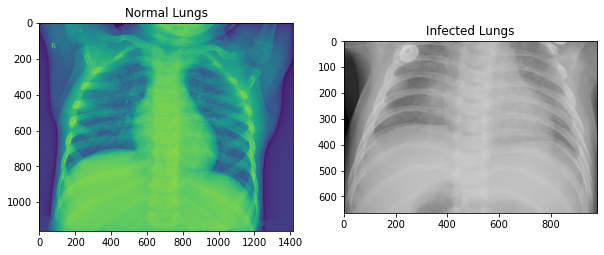

In [ ]:
# Preview random images from each set

# Check the images (normal set)
norm_rand = np.random.randint(0, len(os.listdir(train_normal)))
norm_pic = os.listdir(train_normal)[norm_rand]
pneu_pic = os.listdir(train_pneu)[norm_rand]

# Print selected filename
print('Normal Image:', norm_pic)
print('Infected Image:', pneu_pic)

# Load the Images
load_norm = Image.open(train_normal + norm_pic)
load_inf = Image.open(train_pneu + pneu_pic)

# Plot the Images
f = plt.figure(figsize = (10,6))

f1 = f.add_subplot(1,2,1)
imgplot = plt.imshow(load_norm)
f1.set_title('Normal Lungs')

f2 = f.add_subplot(1,2,2)
imgplot2 = plt.imshow(load_inf)
f2.set_title('Infected Lungs')

In [ ]:
# Set variables for HyperParameters

# pixel width and length for the target image
h_dimension = 128

# number of epochs or learning iterations through
# which the dataset is exposed to update weights
h_epochs = 10

# size of image batches
h_batch_size = 32

# reference number of feature maps generated
# by convolutional layers
h_feature_maps = 32

# number of channesl utilized in the learning process
# for colored images: channels = 3, mode = 'rgb
# for grayscale images: channel = 1, mode = 'grayscale'
h_channels = 1
h_mode = 'grayscale'

#### Hyperparameters ####
1. Dimension: target image width and length (in pixels) for rescaling of images for processing

2. Epochs: number of learning iterations through which the whole dataset undergoes for weight update

3. Batch size: number of images for each batch

4. Feature maps: number of feature maps generated by convolutional layers

5. Channels and Mode: number of channels utilzed in the learning process (3 for rgb mode, 1 for grayscale mode)

In [ ]:
# Augment Training Sets to avoid overfitting
genset_train = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  rotation_range = 30,
                                  horizontal_flip = True)

genset_val = ImageDataGenerator(rescale = 1./255)
genset_test = ImageDataGenerator(rescale = 1./255)

train_set = genset_train.flow_from_directory(trainfolder,
                                            target_size = (h_dimension, h_dimension),
                                            batch_size = h_batch_size,
                                            class_mode = 'binary',
                                            color_mode = h_mode)

val_set = genset_val.flow_from_directory(valfolder,
                                            target_size = (h_dimension, h_dimension),
                                            batch_size = h_batch_size,
                                            class_mode = 'binary',
                                            color_mode = h_mode)

test_set = genset_test.flow_from_directory(testfolder,
                                            target_size = (h_dimension, h_dimension),
                                            batch_size = 1,
                                            class_mode = 'binary',
                                            color_mode = h_mode)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Data augmentation is performed to mitigate the risk of overfitting in ML. Data augmentation artificially expands the dataset. For images, augmentation techniques include modified versions of the original images. This is specifically useful for small datasets.

Only the training set is artificially augmented. The test set must be preserved because we want to accurately predict using minimally manipulated images.

Modifications include the following:
1. Rescaling - random rescaling
2. Shear - random shearing
3. Zoom - random zoom
4. Rotation - random rotation
5. Horizontal flip - random flips

Other modification options are also available but for this particular exercise, the abovementioned modifications were performed.

The 'flow_from_directory'function allows for pulling from a specific image folder for training and validation. This function also performs resizing and grouping of the images to batches. Note that the use of 'flow_from_directory' assumes that the data is properly stored in appropriate folders.

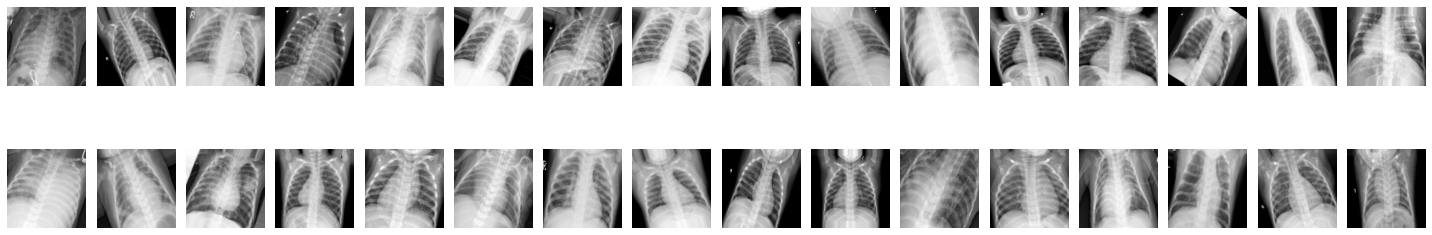

In [ ]:
# Visualize the new datasets
image_batch = train_set[0][0]

plt.figure(figsize = (20, 5))
for i in range(len(image_batch)):
    plt.subplot(2,len(image_batch)/2, i+1)
    set_image = array_to_img(image_batch[i])
    plt.imshow(set_image, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# CNN - Feature Extraction Layer

# Initialize CNN
model = Sequential()

# Convolution - First Layer
model.add(Conv2D(h_feature_maps, (3,3),
                 input_shape = (h_dimension, h_dimension, h_channels),
                 padding = 'same', 
                 activation = "relu" ))

# Pooling - First Layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Second Layer
model.add(Conv2D(h_feature_maps,(3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Third Layer
model.add(Conv2D(h_feature_maps,(3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Flatten the Layer
model.add(Flatten())

# ANN - Classification Layer

# Fully Connected Layers
model.add(Dense(units = h_feature_maps * 2, activation = 'relu'))
model.add(Dropout(0.5)) # double check this?
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compile the Neural Network using ADAM optimization function
# binary_crossentropy is the loss function
# performance is measured via the 'accuracy' metric
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

### Initialization of the Model ###

Model used is based on the 'Sequential' model from keras. This is a linear stack of layers.

*   1st Convolutional Layer: input layer.

> First parameter: amount of convolutional filters in the layer. This is also the number of neurons in this layer

> Second parameter: filter size

> Third parameter: Input shape (only in layer 1). Input shape is the shape of the images that will be fed to the CNN.

> Fourth parameter: Padding set to 'same'. This will pad the input that makes the output have the same length as the initial input

> Fifth parameter: Activation function 'ReLu'

*   Succeeding layers will follow the same configuration as the first layer except without the input size.

*   **Max Pooling Layer**: max pooling layers will only have on parameter for this model. The parameter is the pool size, or the factor to downscale the input's spatial dimensions. The pool size will be set to (2, 2), which will downscale by half each time.

*  ** Flatten **: Flattening is required to convert multi-dimensional data into usable data for the fully connected layers.

*   Fully Connected Network
1. **Dense-ReLu**: every neuron is connected to all the neurons in previous layers. ReLu activation is used.

2. **Dropout**: used to regularize our model and reduce overfitting. This will temporary 'drop out'random nodes in teh fully connected layers

3. **Dense-Sigmoid**: Fully connected layer using the sigmoid function. Since our problem involves two classes,  sigmoid can be used to return a probability between 0 and 1.

### Model Configuration ###

Model is configured using the 'compile'method. 

1. Optimizer used is 'adam'. 
2. Loss function used is 'binary cross entropy'. 
3. Metric function is used to measure the performance of the model. Accuracy of prediction is used for this particular model.



In [ ]:
# Fitting the CNN Model
model_fit = model.fit_generator(train_set,
                               steps_per_epoch = len(train_set),
                               epochs = h_epochs,
                               validation_data = val_set,
                               validation_steps = len(val_set))

Epoch 1/10
163/163 [==============================] - 144s 877ms/step - loss: 0.5131 - accuracy: 0.7648 - val_loss: 0.9525 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 143s 872ms/step - loss: 0.2958 - accuracy: 0.8680 - val_loss: 0.9535 - val_accuracy: 0.5625
Epoch 3/10
163/163 [==============================] - 144s 883ms/step - loss: 0.2626 - accuracy: 0.8933 - val_loss: 0.8873 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 143s 876ms/step - loss: 0.2401 - accuracy: 0.8990 - val_loss: 1.1699 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 142s 871ms/step - loss: 0.2255 - accuracy: 0.9162 - val_loss: 0.7686 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 142s 866ms/step - loss: 0.2135 - accuracy: 0.9150 - val_loss: 0.8891 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 142s 866ms/step - loss: 0.1939 - accuracy: 0.9249 - val_loss: 0.9361 -

### Training the model ###

Training the model utilizes the fit_generator() method from Keras. This will train the model based on the following parameters:

1. steps per epoch: tells the model the number of batches of samples to produce from the generator before the end of each epoch.

2. number of epochs: defines the total number of iterations

3. validation data: validation data helps measure the loss at the end of every epoch

4. validaton steps: defines the number of batch of samples to produce for the validation set

In [ ]:
# Evaluate Accuracy
accuracy_test = model.evaluate(test_set, steps = len(test_set))
print('Test Accuracy:', accuracy_test[1]*100, '%')

624/624 [==============================] - 11s 17ms/step - loss: 0.4200 - accuracy: 0.8958
Test Accuracy: 89.58333134651184 %


### Testing Accuracy ###
Accuracy is measured using the 'evaluate_generator'method of keras.


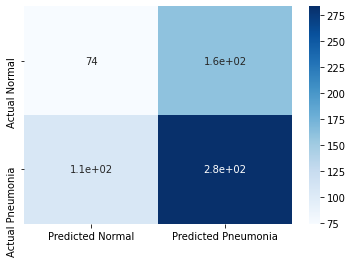

In [ ]:
# Predicting using the Test Set
#model_pred = model.predict(test_set)
model_pred_class = model.predict_classes(test_set)

# Evaluate Confusion Matrix
confmat = confusion_matrix(test_set.classes, model_pred_class)
cm = pd.DataFrame(confmat, index = ['Actual Normal', 'Actual Pneumonia'], columns = ['Predicted Normal', 'Predicted Pneumonia'])
cm

plt.figure()
sns.heatmap(cm, cmap='Blues', linecolor = 'black', annot = True)

In [ ]:
print(classification_report(test_set.classes,  model_pred_class, target_names= ['Pneumonia - 0', 'Normal - 1']))

               precision    recall  f1-score   support

Pneumonia - 0       0.41      0.32      0.36       234
   Normal - 1       0.64      0.73      0.68       390

     accuracy                           0.57       624
    macro avg       0.52      0.52      0.52       624
 weighted avg       0.55      0.57      0.56       624



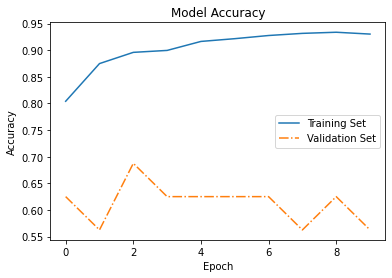

In [ ]:
# Check for Accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'],'-.')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'])
plt.show()

In [ ]:

end_time = datetime.now()
print('\nStart time:', start_time)
print('End time:', end_time)
print('Time Elapsed:', end_time - start_time)


Start time: 2021-02-16 22:08:45.394840
End time: 2021-02-16 22:32:54.487803
Time Elapsed: 0:24:09.092963
